## 零、定义问题

### &nbsp;&nbsp;&nbsp; &nbsp;1.1 数据介绍

### &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

### &nbsp;&nbsp;&nbsp; &nbsp;1.2 问题定义

### &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;根据花萼长宽和花瓣长宽，推断花的种类

## 一、导入数据

### &nbsp;&nbsp;&nbsp; &nbsp;1.1 导入类库

In [17]:
# 导入类库
from pandas import read_csv
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #要注意的是一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式
%matplotlib notebook

### &nbsp;&nbsp;&nbsp; &nbsp;1.2 导入数据集

In [3]:
# 导入数据
iris =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
iris.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] 

## 二、数据概述

### &nbsp;&nbsp;&nbsp; &nbsp;2.1 查看数据维度

In [4]:
#显示数据维度
print('数据维度: 行 %s，列 %s' % iris.shape)

数据维度: 行 150，列 5


### &nbsp;&nbsp;&nbsp; &nbsp;2.2 查看数据

In [6]:
# 查看数据的前5行
print(iris.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


### &nbsp;&nbsp;&nbsp; &nbsp;2.3 数据统计描述

In [7]:
# 统计描述数据信息
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### &nbsp;&nbsp;&nbsp; &nbsp;2.4 数据分布情况

In [10]:
# 分类分布情况
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### &nbsp;&nbsp;&nbsp; &nbsp;2.5 缺失数据处理

In [11]:
# 无缺失数据
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


## 三、数据可视化

### &nbsp;&nbsp;&nbsp; &nbsp;3.1单变量图表

<IPython.core.display.Javascript object>


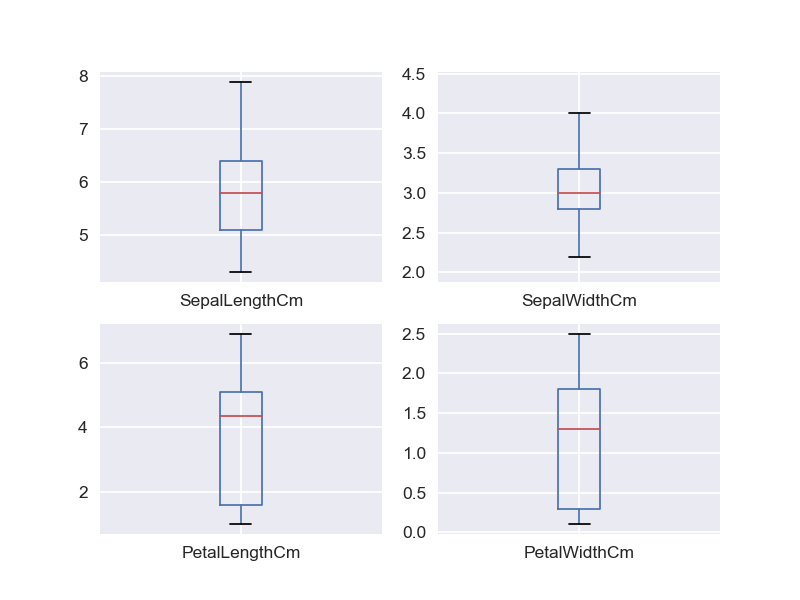

In [12]:
# 箱线图
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

<IPython.core.display.Javascript object>


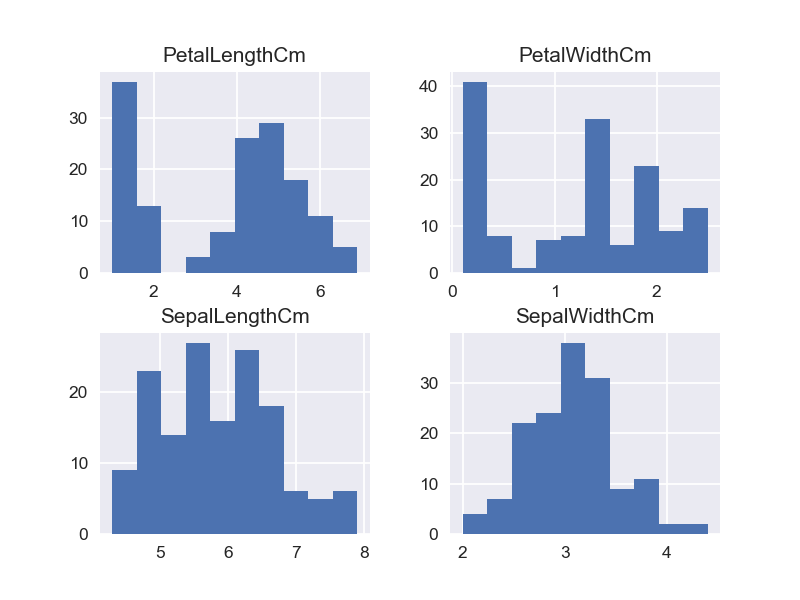

In [13]:
# 直方图
iris.hist()
pyplot.show()

### &nbsp;&nbsp;&nbsp; &nbsp;3.2多变量图表

<IPython.core.display.Javascript object>


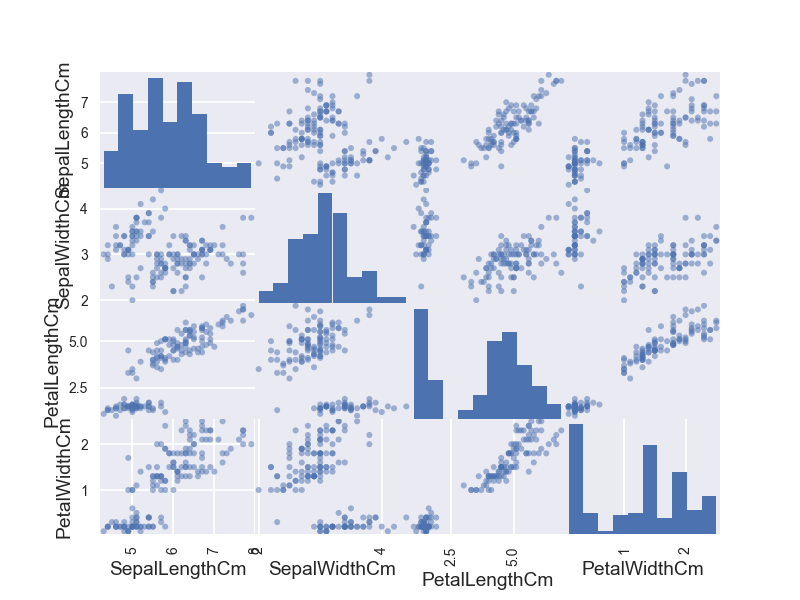

In [14]:
# 散点矩阵图
scatter_matrix(iris)
pyplot.show()

## 四、评估算法

### &nbsp;&nbsp;&nbsp; &nbsp;4.1分离数据集

In [20]:
# 将数据分为输入数据和输出结果
arrary = iris.values
# print(arrary)
X =arrary[:,0:4]

le = LabelEncoder()
le.fit(iris['Species'])   
Y = le.transform(iris['Species']) # 对花的类别进行编号处理


# 分离数据集
array = iris.values
X = array[:, 0:4] 
Y = array[:, 4]


validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### &nbsp;&nbsp;&nbsp; &nbsp;4.2评估算法

KNN: 0.983 (0.033)
LDA: 0.975 (0.038)
SVM: 0.992 (0.025)
NB: 0.975 (0.053)
CART: 0.975 (0.038)
RF: 0.967 (0.041)
LR: 0.967 (0.041)


<IPython.core.display.Javascript object>


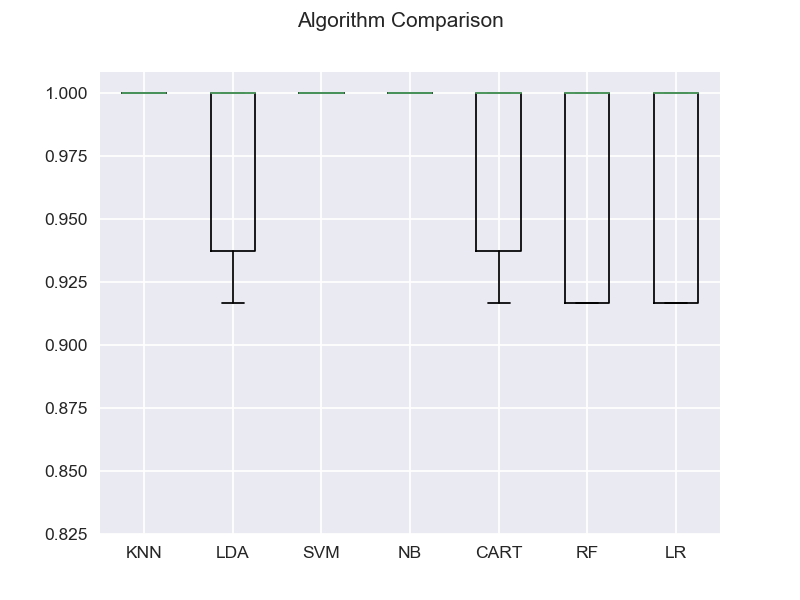

In [21]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
models = {}

# 逻辑回归
models['LR'] = LogisticRegression()
# 线性判别分析
models['LDA'] = LinearDiscriminantAnalysis()
# K近邻
models['KNN'] = KNeighborsClassifier()
# 分类与回归树
models['CART'] = DecisionTreeClassifier()
# 支持向量机
models['SVM'] = SVC()
# 随机森林
models['RF'] = RandomForestClassifier(10)
# 朴素贝叶斯分类器
models['NB'] = GaussianNB()

results = []
for name in models:
    result = cross_val_score(models[name], X_train, Y_train, cv=kfold)
    results.append(result)
    msg = '%s: %.3f (%.3f)' % (name, result.mean(), result.std())
    print(msg)

# 图表显示
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

## 五、实施预测

In [22]:
#使用评估数据集评估算法
svm = SVC()
svm.fit(X=X_train, y=Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



## 六、git与参考

### &nbsp;&nbsp;&nbsp; &nbsp;git ：https://coding.net/u/RuoYun/p/Python-of-machine-learning/git/tree/master
### &nbsp;&nbsp;&nbsp; &nbsp;参考：https://read.douban.com/column/6939417/